C:\Users\esino\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


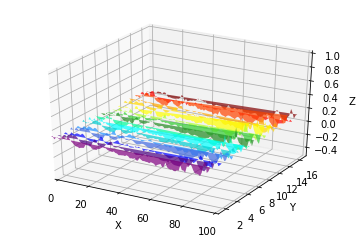

In [3]:
"""
=============================================
Generate polygons to fill under 3D line graph
=============================================

Demonstrate how to create polygons which fill the space under a line
graph. In this example polygons are semi-transparent, creating a sort
of 'jagged stained glass' effect.
"""
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

plt.figure(figsize=(20,14))
fig = plt.figure()
ax = fig.gca(projection='3d')


def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

w=pd.read_excel('C:\\Users\\\esino\\Dropbox\\Master Thesis Work - Esin Ören\\Data\\normalized.xlsx', sheetname=0).values

xs = np.arange(0, len(w))
verts = []
zs = np.arange(17)

for z in zs:
    ys = w[:100,z]
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('purple'), cc('indigo'), cc('blue'),cc('royalblue'),cc('dodgerblue'), 
                                         cc('darkturquoise'), cc('aqua'),cc('mediumspringgreen'),cc('forestgreen'), 
                                         cc('limegreen'), cc('greenyellow'),cc('yellow'),cc('gold'), cc('orange'), 
                                         cc('orangered'),cc('red'),cc('maroon')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, len(ys),10)
ax.set_ylabel('Y')
ax.set_ylim3d(1, 17,1)
ax.set_zlabel('Z')
ax.set_zlim3d(-0.5, 1)
fig.savefig("C:\\Users\\esino\\Desktop\\all.pdf", bbox_inches='tight')
plt.show()


C:\Users\esino\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


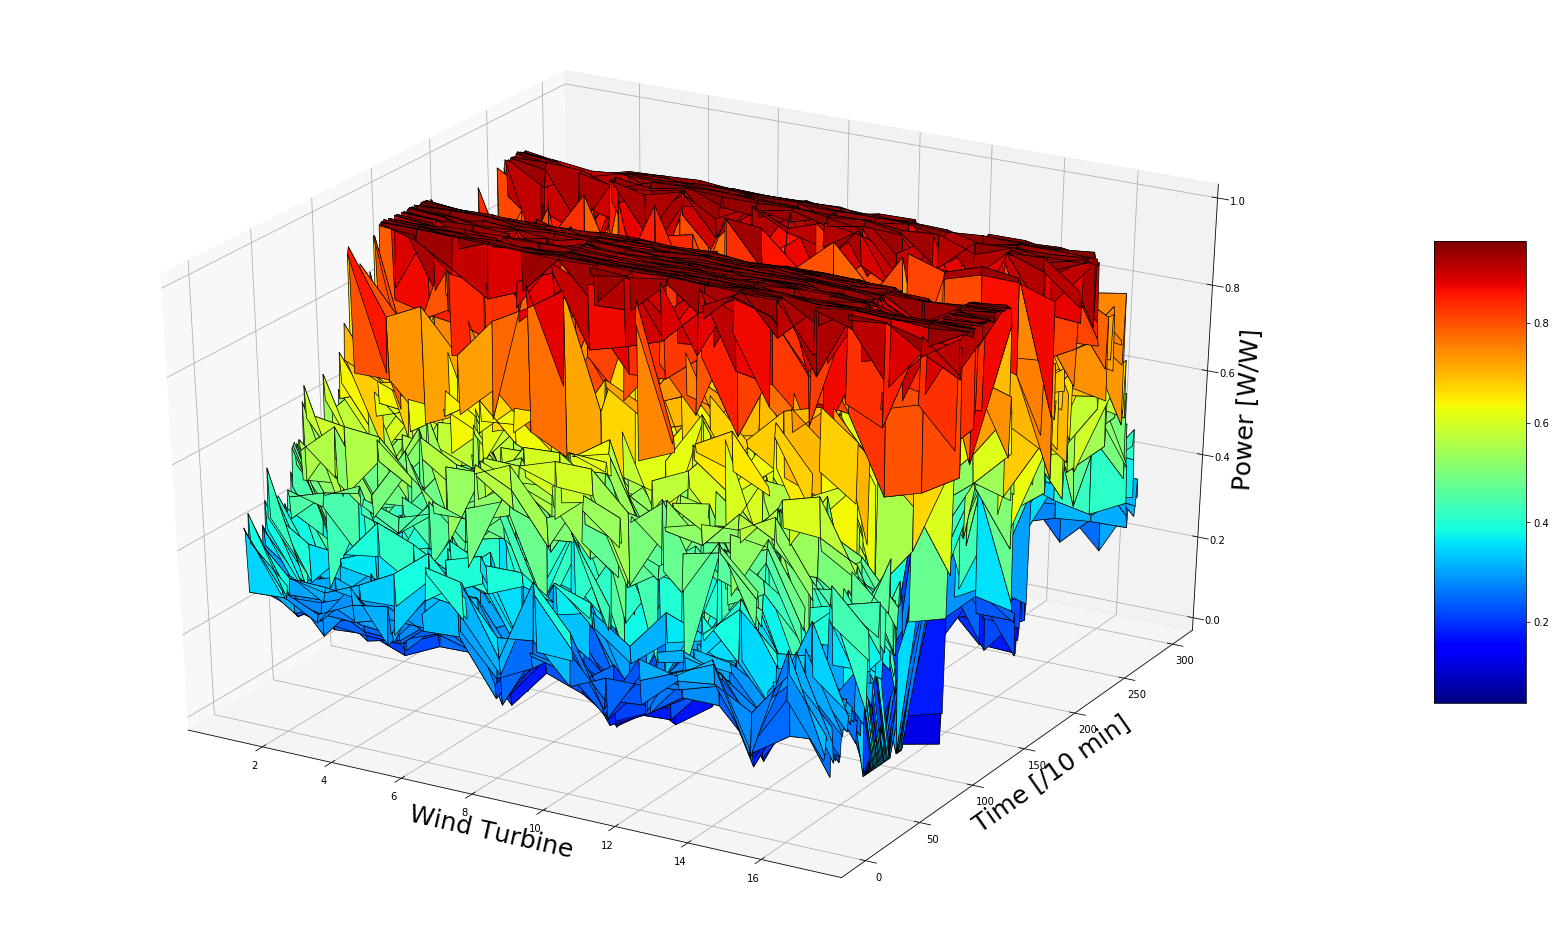

In [8]:

from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

w=pd.read_excel('C:\\Users\\\esino\\Dropbox\\Master Thesis Work - Esin Ören\\Data\\normalized.xlsx', sheetname=0)
fig = plt.figure(figsize=(30,17))
ax = fig.gca(projection='3d')
Z = np.array(w.iloc[2000:2300,:])
X = np.arange(1,18,1)
Y=np.arange(len(Z))
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=cm.jet,linewidth=0.7,shade=False,antialiased=True,edgecolors='k')
ax.set_zlim(-0.01, 1.01)

ax.set_xlabel('Wind Turbine',fontsize=25)
ax.set_ylabel('Time [/10 min]',fontsize=25)
ax.set_zlabel('Power [W/W]',fontsize=25)

fig.colorbar(surf, shrink=0.5, aspect=5)
fig.savefig("C:\\Users\\esino\\Desktop\\all.pdf", bbox_inches='tight')
plt.show()


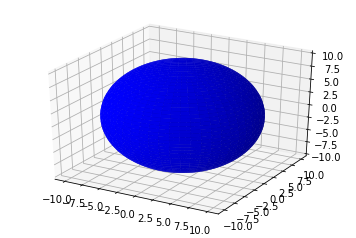

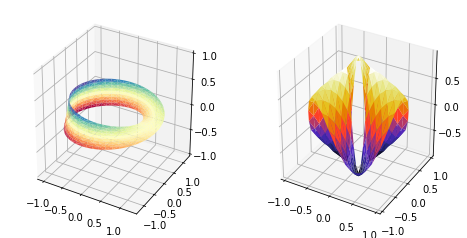

In [4]:
'''
========================
3D surface (solid color)
========================

Demonstrates a very basic plot of a 3D surface using a solid color.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()
'''
===========================
More triangular 3D surfaces
===========================

Two additional examples of plotting surfaces with triangular mesh.

The first demonstrates use of plot_trisurf's triangles argument, and the
second sets a Triangulation object's mask and passes the object directly
to plot_trisurf.
'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri


fig = plt.figure(figsize=plt.figaspect(0.5))

#============
# First plot
#============

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)


#============
# Second plot
#============

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid**2 + ymid**2 < min_radius**2, 1, 0)
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')

plt.show()
